<a href="https://colab.research.google.com/github/AndresQui20/Clase-inteligencia-artificial/blob/main/Copia_de_proyectoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("waqi786/global-air-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/waqi786/global-air-quality-dataset/versions/1


In [ ]:
import pandas
import numpy as np
df=pandas.read_csv(path+"/global_air_quality_data_10000.csv")
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [ ]:
# prompt: crea una nueva columna llamada Calidad Viento en el cual dependiendo del valor de la columna PM2.5 coloque Bueno si es de 0-9, Moderado si es de 9.1-35.4, Regular si es de 35.5-55.4, No Saludable si es de 55.5-125.4, Dañino si es de 125.5-225.4 y Muy dañino si es mayor a 225.5

def calidad_viento(pm25):
    if 0 <= pm25 <= 9:
        return "Bueno"
    elif 9.1 <= pm25 <= 35.4:
        return "Moderado"
    elif 35.5 <= pm25 <= 55.4:
        return "Regular"
    elif 55.5 <= pm25 <= 125.4:
        return "No Saludable"
    elif 125.5 <= pm25 <= 225.4:
        return "Dañino"
    else:
        return "Muy dañino"


df['Calidad Viento'] = df['PM2.5'].apply(calidad_viento)
df.drop(['PM2.5'], axis=1, inplace=True)
df.head()


,City,Country,Date,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Calidad Viento
0,Bangkok,Thailand,2023-03-19,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,No Saludable
1,Istanbul,Turkey,2023-02-16,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,Regular
2,Rio de Janeiro,Brazil,2023-11-13,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,Dañino
3,Mumbai,India,2023-03-16,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,No Saludable
4,Paris,France,2023-04-04,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,Regular


In [ ]:
df.describe()

,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
std,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628
min,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000
max,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000


In [ ]:
#suma los nulos
df.isnull().sum()

,0
City,0
Country,0
Date,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0
Temperature,0
Humidity,0


In [ ]:
# prompt: separa date en dia y mes con sen y cos

import datetime
import numpy as np

# Assuming your DataFrame has a column named 'date' containing dates in a suitable format (e.g., 'YYYY-MM-DD')
# If not, you might need to convert it to a datetime object first.

def separate_date(row):
    try:
        date_obj = datetime.datetime.strptime(row['Date'], '%Y-%m-%d')
        day = date_obj.day / 31  # Normalizado entre 0 y 1
        month = date_obj.month / 12  # Normalizado entre 0 y 1
        return np.sin(2 * np.pi * day), np.cos(2 * np.pi * month)
    except (ValueError, TypeError):
        return np.nan, np.nan


df['sin_day'], df['cos_month'] = zip(*df.apply(separate_date, axis=1))

# Handle potential NaNs introduced in 'sin_day' and 'cos_month'
df['sin_day'].fillna(df['sin_day'].mean(), inplace=True)
df['cos_month'].fillna(df['cos_month'].mean(), inplace=True)

<ipython-input-66-640653cd1982>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sin_day'].fillna(df['sin_day'].mean(), inplace=True)
<ipython-input-66-640653cd1982>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:

# Eliminar las columnas originales date
df.drop(["Date"], axis=1, inplace=True)
df.head()


,City,Country,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Calidad Viento,sin_day,cos_month
0,Bangkok,Thailand,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,No Saludable,-0.651372,6.123234e-17
1,Istanbul,Turkey,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,Regular,-0.101168,5.000000e-01
2,Rio de Janeiro,Brazil,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,Dañino,0.485302,8.660254e-01
3,Mumbai,India,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,No Saludable,-0.101168,6.123234e-17
4,Paris,France,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,Regular,0.724793,-5.000000e-01


In [ ]:
#manejo de variables nominales
df["City_Frequency"] = df["City"].map(df["City"].value_counts())
df["Country_Frequency"] = df["Country"].map(df["Country"].value_counts())
df.head()


,City,Country,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Calidad Viento,sin_day,cos_month,City_Frequency,Country_Frequency
0,Bangkok,Thailand,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,No Saludable,-0.651372,6.123234e-17,499,499
1,Istanbul,Turkey,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,Regular,-0.101168,5.000000e-01,492,492
2,Rio de Janeiro,Brazil,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,Dañino,0.485302,8.660254e-01,491,491
3,Mumbai,India,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,No Saludable,-0.101168,6.123234e-17,540,540
4,Paris,France,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,Regular,0.724793,-5.000000e-01,489,489


In [ ]:
# muetsrame las ciudades que salen cuando en cada pais
df.groupby("Country")["City"].value_counts()

,,count
Country,City,
Australia,Sydney,486
Brazil,Rio de Janeiro,491
Canada,Toronto,518
China,Beijing,488
Egypt,Cairo,510
France,Paris,489
Germany,Berlin,519
India,Mumbai,540
Japan,Tokyo,491


In [ ]:
#crear diccionario de frecuencias de city y country y luego borrar las columnas}
import joblib
city_frequency = df["City"].value_counts().to_dict()
country_frequency = df["Country"].value_counts().to_dict()
joblib.dump(city_frequency, "frecuencia_ciudades.joblib")
joblib.dump(country_frequency, "frecuencia_paises.joblib")
df.drop(["City", "Country"], axis=1, inplace=True)
df.head()


,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Calidad Viento,sin_day,cos_month,City_Frequency,Country_Frequency
0,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,No Saludable,-0.651372,6.123234e-17,499,499
1,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,Regular,-0.101168,5.000000e-01,492,492
2,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,Dañino,0.485302,8.660254e-01,491,491
3,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,No Saludable,-0.101168,6.123234e-17,540,540
4,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,Regular,0.724793,-5.000000e-01,489,489


In [ ]:
#crear una nueva columna de Calidad Viento usar mapeo directo a valores numericos y guardarlo en unn diccionario con joblib
calidadViento={"Bueno": 1,"Regular": 2,"Muy dañino": 3}
df["Calidad Viento"] = df["Calidad Viento"].map(calidadViento)

joblib.dump(calidadViento, "CalidadViento.joblib")
data=joblib.load("CalidadViento.joblib")
data

{'Bueno': 1, 'Regular': 2, 'Muy dañino': 3}

In [ ]:
df.head()

,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Calidad Viento,sin_day,cos_month,City_Frequency,Country_Frequency
0,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,NaN,-0.651372,6.123234e-17,499,499
1,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,2.0,-0.101168,5.000000e-01,492,492
2,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,NaN,0.485302,8.660254e-01,491,491
3,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,NaN,-0.101168,6.123234e-17,540,540
4,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,2.0,0.724793,-5.000000e-01,489,489


In [ ]:
df["Calidad Viento"].describe()

,Calidad Viento
count,1690.000000
mean,1.849704
std,0.401171
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


In [ ]:
df.isnull().sum()

,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0
Temperature,0
Humidity,0
Wind Speed,0
Calidad Viento,8310
sin_day,0


In [ ]:
df.fillna(3, inplace=True)

In [ ]:
df.isnull().sum()

,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0
Temperature,0
Humidity,0
Wind Speed,0
Calidad Viento,0
sin_day,0


In [ ]:
# prompt: muestra cuantos datos hay dependiendo de calidad viento

# Mostrar la cantidad de datos para cada nivel de calidad de viento
print(df.groupby('Calidad Viento')['Calidad Viento'].count())


Calidad Viento
1.0     282
2.0    1380
3.0    8338
Name: Calidad Viento, dtype: int64


In [ ]:
#Relacion ciudad frecuencia
city_frequency

{'Mumbai': 540,
 'Seoul': 522,
 'Johannesburg': 521,
 'Dubai': 520,
 'Berlin': 519,
 'Toronto': 518,
 'Madrid': 518,
 'Cairo': 510,
 'Bangkok': 499,
 'Los Angeles': 497,
 'Istanbul': 492,
 'Rio de Janeiro': 491,
 'Tokyo': 491,
 'London': 489,
 'Paris': 489,
 'Beijing': 488,
 'Sydney': 486,
 'Moscow': 482,
 'New York': 465,
 'Mexico City': 463}

In [ ]:
#Relacion pais frecuencia
country_frequency

{'USA': 962,
 'India': 540,
 'South Korea': 522,
 'South Africa': 521,
 'UAE': 520,
 'Germany': 519,
 'Canada': 518,
 'Spain': 518,
 'Egypt': 510,
 'Thailand': 499,
 'Turkey': 492,
 'Brazil': 491,
 'Japan': 491,
 'France': 489,
 'UK': 489,
 'China': 488,
 'Australia': 486,
 'Russia': 482,
 'Mexico': 463}

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Normalizar las características
scaler = MinMaxScaler()
X[["PM10", "NO2", "SO2", "CO", "O3", "Temperature", "Humidity", "Wind Speed", "City_Frequency", "Country_Frequency"]] = scaler.fit_transform(X[["PM10", "NO2", "SO2", "CO", "O3", "Temperature", "Humidity", "Wind Speed", "City_Frequency", "Country_Frequency"]])

# Guardar el normalizador para futuras predicciones
joblib.dump(scaler, "normalizador.joblib")


['normalizador.joblib']

In [ ]:
#Separa X y y
X = df.drop(["Calidad Viento"], axis=1)
y = df["Calidad Viento"]
X

,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,sin_day,cos_month,City_Frequency,Country_Frequency
0,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,-0.651372,6.123234e-17,499,499
1,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,-0.101168,5.000000e-01,492,492
2,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,0.485302,8.660254e-01,491,491
3,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,-0.101168,6.123234e-17,540,540
4,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,0.724793,-5.000000e-01,489,489
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48,-0.101168,-1.836970e-16,521,521
9996,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75,0.848644,1.000000e+00,519,519
9997,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56,-0.848644,8.660254e-01,482,482
9998,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71,0.571268,5.000000e-01,519,519


In [ ]:
df.shape

(10000, 13)

In [ ]:
#dividir los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (8000, 12)
Tamaño del conjunto de prueba: (2000, 12)


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Aplicar UnderSampling para reducir la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

# Mostrar la distribución después del balanceo
import pandas as pd
print("Distribución de clases después del balanceo:")
print(pd.Series(y_resampled).value_counts())


Distribución de clases después del balanceo:
Calidad Viento
1.0    6670
2.0    6670
3.0    6670
Name: count, dtype: int64


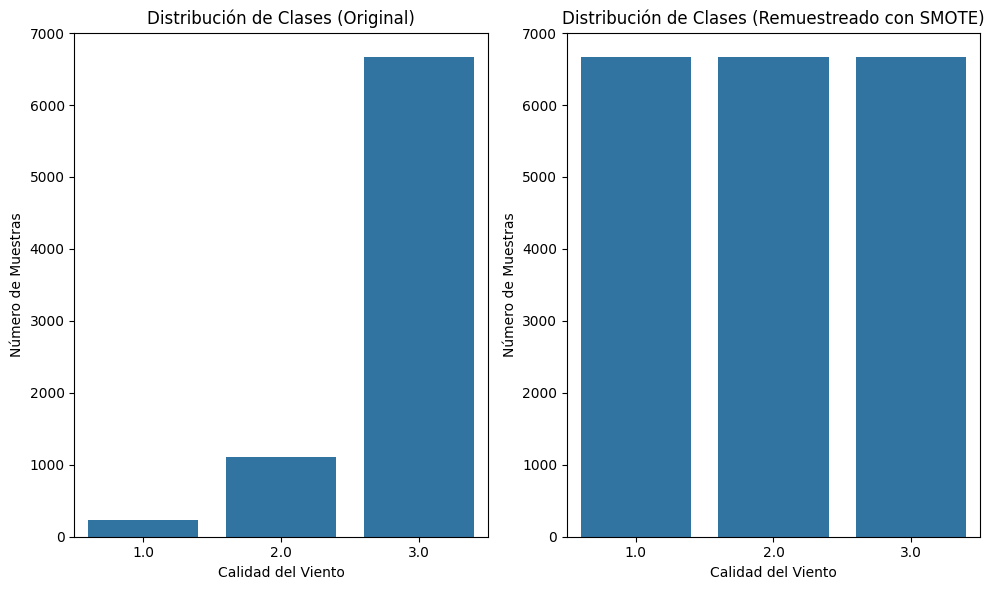

In [ ]:
# prompt: genera grafico del balamnceo de datos

import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de muestras para cada clase en el conjunto de entrenamiento original
class_counts_original = y_train.value_counts()

# Contar la cantidad de muestras para cada clase en el conjunto de entrenamiento remuestreado
class_counts_resampled = y_resampled.value_counts()

# Crear un gráfico de barras para comparar la distribución de clases
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribución de Clases (Original)')
plt.xlabel('Calidad del Viento')
plt.ylabel('Número de Muestras')

plt.subplot(1, 2, 2)
sns.countplot( x=y_resampled)
plt.title('Distribución de Clases (Remuestreado con SMOTE)')
plt.xlabel('Calidad del Viento')
plt.ylabel('Número de Muestras')

plt.tight_layout()
plt.show()



In [ ]:
# Crear Modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Crear instancia del modelo MultinomialNB
model = GaussianNB()
model.fit(X_train, y_train)





GaussianNB()

In [ ]:
# prompt: predecir y calcular accuracy

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")


Precisión del modelo: 0.834


In [ ]:
y.to_numpy()[:40]

array([3., 2., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2.,
       3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 2., 2., 3., 2., 3., 3.,
       3., 2., 3., 3., 3., 3.])

In [ ]:
#calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.40%


In [ ]:
# prompt: haz un modelo con arboles de decision

from sklearn.tree import DecisionTreeClassifier

# Crear un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones y calcular accuracy en porcentaje
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 69.50%


In [ ]:
# prompt: muestrame el porcentaje de cada feature para predecir

# Calcular el porcentaje de cada feature en la predicción
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

# Mostrar el porcentaje de cada feature
for index, row in feature_importances.iterrows():
  print(f"{row['feature']}: {row['importance'] * 100:.2f}%")


              feature  importance
2                 SO2    0.117462
4                  O3    0.107662
6            Humidity    0.106266
5         Temperature    0.100690
1                 NO2    0.100289
3                  CO    0.099219
0                PM10    0.093872
7          Wind Speed    0.084627
8             sin_day    0.069318
9           cos_month    0.047527
11  Country_Frequency    0.038120
10     City_Frequency    0.034948
SO2: 11.75%
O3: 10.77%
Humidity: 10.63%
Temperature: 10.07%
NO2: 10.03%
CO: 9.92%
PM10: 9.39%
Wind Speed: 8.46%
sin_day: 6.93%
cos_month: 4.75%
Country_Frequency: 3.81%
City_Frequency: 3.49%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Precisión del modelo: 0.834

Reporte de clasificación:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        56
         2.0       0.00      0.00      0.00       276
         3.0       0.83      1.00      0.91      1668

    accuracy                           0.83      2000
   macro avg       0.28      0.33      0.30      2000
weighted avg       0.70      0.83      0.76      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: crea un modelo con SVM

from sklearn.svm import SVC

# Crear un modelo SVM
model = SVC(kernel='rbf', random_state=42)  # Puedes cambiar el kernel (linear, rbf, poly, sigmoid)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Precisión del modelo SVM: 0.834

Reporte de clasificación:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        56
         2.0       0.00      0.00      0.00       276
         3.0       0.83      1.00      0.91      1668

    accuracy                           0.83      2000
   macro avg       0.28      0.33      0.30      2000
weighted avg       0.70      0.83      0.76      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.combine import SMOTETomek
import pandas as pd

# Aplicar SMOTETomek para balancear datos
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

# Mostrar la distribución después del balanceo
print("Distribución de clases después del balanceo:")
print(pd.Series(y_resampled).value_counts())


Distribución de clases después del balanceo:
Calidad Viento
1.0    6664
2.0    6617
3.0    6613
Name: count, dtype: int64


In [ ]:
df.head()

,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Calidad Viento,sin_day,cos_month,City_Frequency,Country_Frequency
0,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,3.0,-0.651372,6.123234e-17,499,499
1,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,2.0,-0.101168,5.000000e-01,492,492
2,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,3.0,0.485302,8.660254e-01,491,491
3,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,3.0,-0.101168,6.123234e-17,540,540
4,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,2.0,0.724793,-5.000000e-01,489,489


In [ ]:
import numpy as np

def remove_outliers_iqr(df, column):
  """
  Elimina outliers de una columna usando el Rango Intercuartil (IQR).

  Args:
    df: DataFrame de pandas.
    column: Nombre de la columna a procesar.

  Returns:
    DataFrame sin outliers.
  """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

# Aplica la función a las columnas que desees:
df = remove_outliers_iqr(df, 'PM10')
df = remove_outliers_iqr(df, 'NO2')
# ... (aplica a otras columnas numéricas)

In [ ]:
from scipy import stats

def remove_outliers_zscore(df, column, threshold=3):
  """
  Elimina outliers de una columna usando el Z-Score.

  Args:
    df: DataFrame de pandas.
    column: Nombre de la columna a procesar.
    threshold: Umbral del Z-Score para definir outliers.

  Returns:
    DataFrame sin outliers.
  """
  z = np.abs(stats.zscore(df[column]))
  df_filtered = df[(z < threshold)]
  return df_filtered

# Aplica la función a las columnas que desees:
df = remove_outliers_zscore(df, 'PM10')
df = remove_outliers_zscore(df, 'NO2')
# ... (aplica a otras columnas numéricas)

In [ ]:
df.head()

,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Calidad Viento,sin_day,cos_month,City_Frequency,Country_Frequency
0,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,3.0,-0.651372,6.123234e-17,499,499
1,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,2.0,-0.101168,5.000000e-01,492,492
2,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,3.0,0.485302,8.660254e-01,491,491
3,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,3.0,-0.101168,6.123234e-17,540,540
4,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,2.0,0.724793,-5.000000e-01,489,489


In [ ]:
# Mostrar la distribución después del balanceo
import pandas as pd
print("Distribución de clases después del balanceo:")
print(pd.Series(y_resampled).value_counts())

Distribución de clases después del balanceo:
Calidad Viento
1.0    6664
2.0    6617
3.0    6613
Name: count, dtype: int64


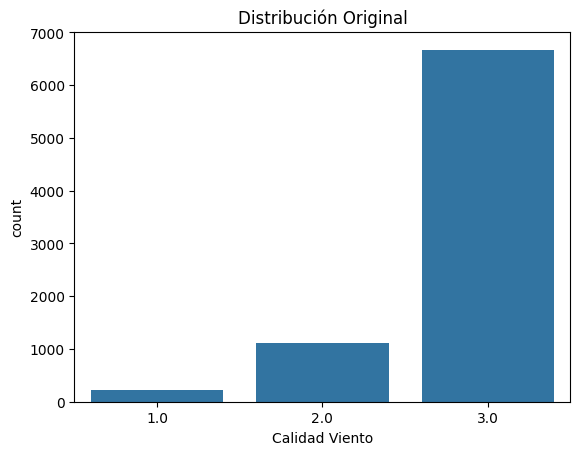

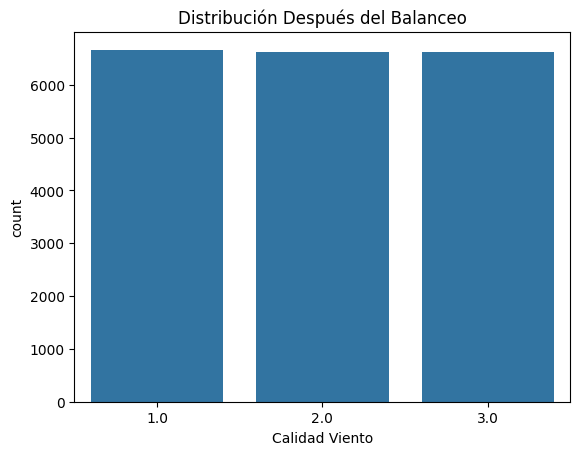

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución original
sns.countplot(x=y_train) # y_train son tus datos originales
plt.title('Distribución Original')
plt.show()

# Distribución después del balanceo
sns.countplot(x=y_resampled) # y_resampled son tus datos balanceados
plt.title('Distribución Después del Balanceo')
plt.show()

In [ ]:
# ... (tu código anterior) ...


#Separa X y y
# Tienes que volver a crear X e y de nuevo desde el dataframe actualizado (df)
X = df.drop(["Calidad Viento"], axis=1)
y = df["Calidad Viento"]


#dividir los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")



# ... tu código existente para SMOTE y RandomUnderSampler ...


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inicializa el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo después de crear nuevos X_train e y_train
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# ... (resto de tu código) ...

Tamaño del conjunto de entrenamiento: (8000, 12)
Tamaño del conjunto de prueba: (2000, 12)
Precisión del modelo: 0.834

Reporte de clasificación:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        56
         2.0       0.00      0.00      0.00       276
         3.0       0.83      1.00      0.91      1668

    accuracy                           0.83      2000
   macro avg       0.28      0.33      0.30      2000
weighted avg       0.70      0.83      0.76      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ... (código anterior) ...

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo y obtener el reporte como un diccionario
report = classification_report(y_test, y_pred, output_dict=True)

# Formatear la salida para mostrar porcentajes
print("Precisión del modelo:", f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\n📊 Reporte de Clasificación:\n")

for clase, metrics in report.items():
    if clase in ['accuracy', 'macro avg', 'weighted avg']:
        continue  # Omitir las métricas generales, solo mostrar las clases
    print(f"Clase: {clase}")
    print(f"  Precisión: {metrics['precision'] * 100:.2f}%")
    print(f"  Recall: {metrics['recall'] * 100:.2f}%")
    print(f"  F1-score: {metrics['f1-score'] * 100:.2f}%")
    print(f"  Soporte: {metrics['support']}")
    print("-" * 20)

# ... (resto de tu código) ...

Precisión del modelo: 83.40%

📊 Reporte de Clasificación:

Clase: 1.0
  Precisión: 0.00%
  Recall: 0.00%
  F1-score: 0.00%
  Soporte: 56.0
--------------------
Clase: 2.0
  Precisión: 0.00%
  Recall: 0.00%
  F1-score: 0.00%
  Soporte: 276.0
--------------------
Clase: 3.0
  Precisión: 83.40%
  Recall: 100.00%
  F1-score: 90.95%
  Soporte: 1668.0
--------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import joblib
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(knn_model, "knn_model.joblib")

print("Modelo KNN guardado correctamente como 'knn_model.joblib'")


Modelo KNN guardado correctamente como 'knn_model.joblib'


In [ ]:
from google.colab import files

df.to_csv("calidad_aire.csv", index=False)
files.download("calidad_aire.csv") # Use the files object from google.colab to download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>